# **Credit Crad Fraud Detection**

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

####  Loading Dataset using .read 

In [2]:
df = pd.read_csv("card_transdata.csv")


## **Missing values and duplicates**

In [3]:
print("Dataframe shape:", df.shape)
df

Dataframe shape: (1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

There are no missing values in the dataset.

In [6]:
df.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

There are no duplicate values in the dataset

In [7]:
#Number of fraud transactions
df[df["fraud"] == 1].fraud.count()

87403

In [33]:
# Calculate the number of fraud and non-fraud transactions
fraud_transactions = df["fraud"].value_counts()
f_count = fraud_transactions[1]
nf_count = fraud_transactions[0]

# Print the results
print(f"Number of fraud transactions: {f_count}")
print(f"Number of non-fraud transactions: {nf_count}")
print(f"Fraud percentage: {f_count / len(df) * 100:.2f}%")

Number of fraud transactions: 87403
Number of non-fraud transactions: 912597
Fraud percentage: 8.74%


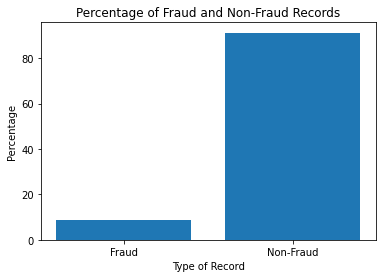

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of fraud and non-fraud records
fraud_count = len(df[df['fraud'] == 1])
non_fraud_count = len(df[df['fraud'] == 0])

# Calculate the percentages
fraud_percentage = fraud_count / len(df) * 100
non_fraud_percentage = non_fraud_count / len(df) * 100

# Create the bar graph
labels = ['Fraud', 'Non-Fraud']
percentages = [fraud_percentage, non_fraud_percentage]

plt.bar(labels, percentages)
plt.title('Percentage of Fraud and Non-Fraud Records')
plt.xlabel('Type of Record')
plt.ylabel('Percentage')
plt.show()


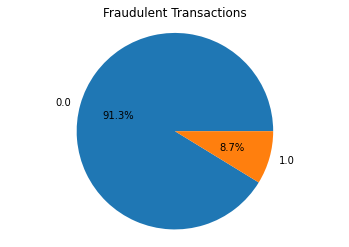

In [40]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each value in the 'fraud' variable
fraud_counts = df['fraud'].value_counts()

# Create a pie chart with the fraud counts
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%')
plt.title('Fraudulent Transactions')
plt.axis('equal')
plt.show()


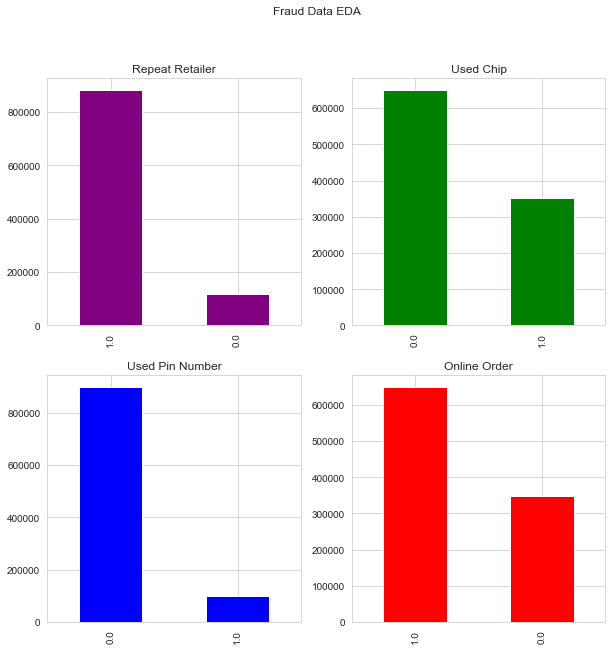

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Create a subplot for each variable of interest
plt.subplot(2, 2, 1)
df['repeat_retailer'].value_counts().plot(kind='bar', color='purple')
plt.title('Repeat Retailer')

plt.subplot(2, 2, 2)
df['used_chip'].value_counts().plot(kind='bar', color='green')
plt.title('Used Chip')

plt.subplot(2, 2, 3)
df['used_pin_number'].value_counts().plot(kind='bar', color='blue')
plt.title('Used Pin Number')

plt.subplot(2, 2, 4)
df['online_order'].value_counts().plot(kind='bar', color='red')
plt.title('Online Order')

# Set the overall title of the figure
plt.suptitle('Fraud Data EDA')

# Display the figure
plt.show()


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_categorical_vars(data, cat_vars):
    # set plot style
    sns.set_style("whitegrid")

    # set up figure and axis objects
    fig, axs = plt.subplots(len(cat_vars), 2, figsize=(10, 4 * len(cat_vars)))
    
    # set up colors and explode values for the pie charts
    colors = ["#66b3ff", "#ffcc99"]
    explode = (0, 0.1)

    # loop through each categorical variable
    for i, var in enumerate(cat_vars):
        
        # create pie chart
        pie_data = data[var].value_counts()
        axs[i, 0].pie(pie_data, labels=pie_data.index, autopct="%.2f%%", colors=colors, explode=explode)
        axs[i, 0].set_title(f"Distribution of {var}", fontsize=10)

        # create bar plot
        sns.countplot(x=var, data=data, ax=axs[i, 1])
        axs[i, 1].set_title(f"Count of {var} by Class", fontsize=10)
        axs[i, 1].set_xlabel(var, fontsize=16)
        axs[i, 1].set_ylabel("Count", fontsize=16)

    plt.tight_layout()
    plt.show()


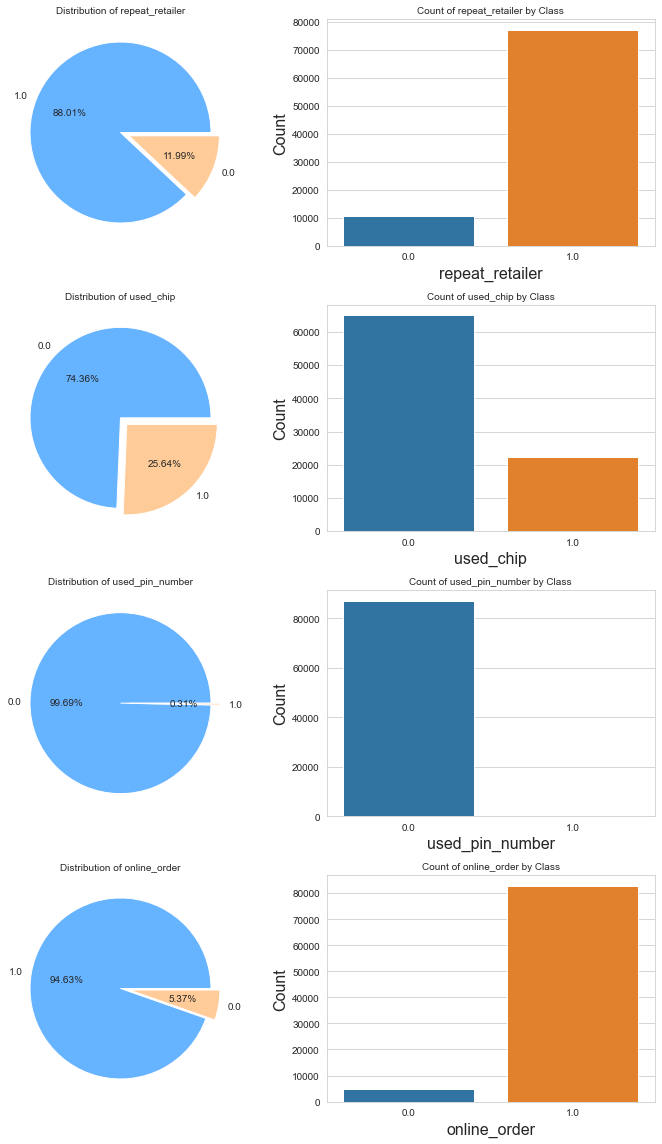

In [55]:
cat_vars = ["repeat_retailer", "used_chip", "used_pin_number", "online_order"]
plot_categorical_vars(fraud_df, cat_vars)


# **Oversampling Technique and Model**

## **Splitting the features and target**

In [56]:
x = df.drop("fraud", axis = 1).values
y = df["fraud"].values

## **Oversampling**

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=39)
non_fraud_over, fraud_over = smote.fit_resample(x, y)

In [58]:
non_fraud_over_df = pd.DataFrame(non_fraud_over, columns=["distance_from_home", "distance_from_last_transaction",
       "ratio_to_median_purchase_price", "repeat_retailer", "used_chip",
       "used_pin_number", "online_order"])
non_fraud_over_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.000000,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.000000,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.000000,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.000000,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.000000,0.0,1.0
...,...,...,...,...,...,...,...
1825189,0.865098,1.341068,4.173964,0.0,1.000000,0.0,1.0
1825190,4.803252,0.744443,6.650998,1.0,1.000000,0.0,1.0
1825191,12.536102,119.006991,4.094842,1.0,0.835731,0.0,1.0
1825192,389.245617,3.480952,0.922567,1.0,0.000000,0.0,1.0


In [59]:
non_fraud_over_df["fraud"] = fraud_over
osdf = non_fraud_over_df

In [60]:
print("osdf shape:", osdf.shape)
print(osdf.info())
osdf.describe()

osdf shape: (1825194, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825194 entries, 0 to 1825193
Data columns (total 8 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   distance_from_home              float64
 1   distance_from_last_transaction  float64
 2   ratio_to_median_purchase_price  float64
 3   repeat_retailer                 float64
 4   used_chip                       float64
 5   used_pin_number                 float64
 6   online_order                    float64
 7   fraud                           float64
dtypes: float64(8)
memory usage: 111.4 MB
None


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1825194.0
mean,4.442516e+01,8.458492e+00,3.694127e+00,8.809996e-01,3.055032e-01,5.625144e-02,7.852103e-01,0.5
std,1.018351e+02,3.750252e+01,4.693421e+00,3.232951e-01,4.555445e-01,2.296677e-01,4.080603e-01,0.5
min,4.874385e-03,1.182816e-04,4.399240e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,4.142911e+00,3.112290e-01,6.944836e-01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
50%,1.173429e+01,1.050549e+00,1.993814e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.5
75%,3.774807e+01,3.800466e+00,5.212519e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.0
max,1.063272e+04,1.185110e+04,2.678029e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0


## **Correlation**

In [61]:
osdf.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.017345,-0.083492,0.156579,-0.107274,-0.037222,0.060905,0.212031
distance_from_last_transaction,-0.017345,1.000000,-0.042851,-0.014638,-0.037251,-0.018364,0.024436,0.110849
ratio_to_median_purchase_price,-0.083492,-0.042851,1.000000,-0.040560,0.029782,-0.091203,0.143558,0.483759
repeat_retailer,0.156579,-0.014638,-0.040560,1.000000,-0.005939,0.001024,0.074406,-0.002079
used_chip,-0.107274,-0.037251,0.029782,-0.005939,1.000000,0.020375,-0.027219,-0.118317
used_pin_number,-0.037222,-0.018364,-0.091203,0.001024,0.020375,1.000000,-0.077735,-0.233786
online_order,0.060905,0.024436,0.143558,0.074406,-0.027219,-0.077735,1.000000,0.399414
fraud,0.212031,0.110849,0.483759,-0.002079,-0.118317,-0.233786,0.399414,1.000000


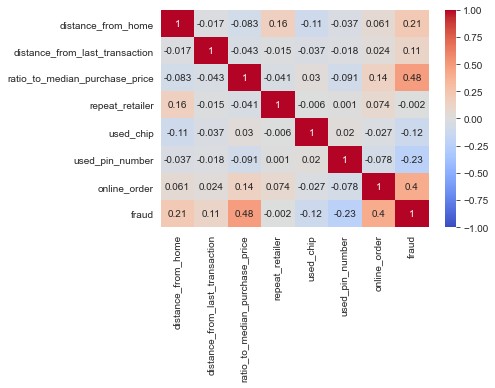

In [62]:
sns.heatmap(osdf.corr().round(3), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
sns.set(rc={"figure.figsize":(10,10)})
plt.show()

## **Analyzing the Dataset**

### **Splitting the dataset into train and test sets**

In [63]:
from sklearn.model_selection import train_test_split

feature_columns = ["distance_from_home", "distance_from_last_transaction",
"ratio_to_median_purchase_price", "repeat_retailer", "used_chip", "used_pin_number", "online_order"]

X_smote = osdf[feature_columns]
y_smote = osdf.fraud

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=39)

### **Logistic Regression**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_smote, y_train_smote)

y_pred_logreg_smote = logreg.predict(X_test_smote)
print("Accuracy of logistic regression classifier on test set: {:.5f}".format(logreg.score(X_test_smote, y_test_smote)))


from sklearn.metrics import classification_report
print(classification_report(y_test_smote, y_pred_logreg_smote, digits=6))



Accuracy of logistic regression classifier on test set: 0.94168
              precision    recall  f1-score   support

         0.0   0.948979  0.933654  0.941254    182679
         1.0   0.934596  0.949715  0.942095    182360

    accuracy                       0.941677    365039
   macro avg   0.941787  0.941684  0.941674    365039
weighted avg   0.941794  0.941677  0.941674    365039



### **Random Forest Algorithm**

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_smote,y_train_smote)

y_pred_rf = clf.predict(X_test_smote)

print("Accuracy:", metrics.accuracy_score(y_test_smote, y_pred_rf))


print(classification_report(y_test_smote, y_pred_rf, digits=6))

Accuracy: 0.9999917817000376
              precision    recall  f1-score   support

         0.0   0.999984  1.000000  0.999992    182679
         1.0   1.000000  0.999984  0.999992    182360

    accuracy                       0.999992    365039
   macro avg   0.999992  0.999992  0.999992    365039
weighted avg   0.999992  0.999992  0.999992    365039

